# Automatic (derivatives) for the people and a song of ice and fire
Jahad Ahmed Hamidi, Rebecca Vangen, Ruhan Reza, Stian Salte

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math


### Abstract

## Introduction

## Exercise 1

### Part 1

We import sys and get float info

In [2]:
import sys
print(sys.float_info)

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)


Max is the largest representable number in computers, similarily min is the smallest representable number in computers.  
Epsilon tells us the smallest number we can add to one to get something other than one, the machine precision.

Most modern computers work on a finite 64-bit format and processes 64 bits at a time. The values given from `sys.float_info` come from the IEEE 754 standard. In this exercise we will focus on IEEE 754 double precision (64-bit) floating-point number.

From the 64 bits we have IEEE reserves one sign bit, 11 exponent bits and 52 fraction(mantissa) bits. There is also a "hidden bit" and implies the float always starts with "1.". To also represent numbers that have absoloute value less than one a number *bias* is added to the exponent. Bias is a fixed number and in 64 bits it is roughly half the exponent; $2^{11-1}-1 = 1023$. With this we can make a formula: 

\begin{equation}
±q2^{E-e}\tag{1}
\end{equation}

where ± is the sign bit, q the mantissa, E the exponent and $e$ the bias. E can have values from 0 to $2^{11} - 1$ = 2047. There are two special numbers to represent zero and infinity which are respectively $E = 0$, and $E = 2047$. With bias this gives us the largest possible exponent $2046 - 1023 = 1023$ and smallest exponent $1 - 1023 = -1022$  

To get the max value the exponent needs to be 1023, and the fraction needs be all ones:

\begin{equation}
1.111 + (49\ more\ ones) \times 2^{1023} = (2^0 + 2^{-1} + 2^{-2} + ... + 2^{-52}) \times 2^{1023} = (2 - 2^{-52}) \times 2^{1023} = 1.7976931348623157 \times 10^{308}\tag{2}
\end{equation}

To get min we set the mantissa to all zeroes and use the lowest exponent:

\begin{equation}
1.000 + (49\ more\ zeroes) \times 2^{-1022} = 2^0 \times 2^{-1022} = 2.2250738585072014 \times 10^{-308}\tag{3}
\end{equation}

To find machine epsilon we use the smallest mantissa possible, which is all zeroes except the last bit; $2^{-52} \times 2^{0} = 2.220446049250313 \times 10^{-16}$. We cannot use an exponent less than zero because if we add that number to 1, it will still be 1.  

It is possible to represent smaller numbers by using unnormalized values.

### Part 2  

The following code shows examples of floating-point arithmetic

In [3]:
print(0.1 + 0.2, 0.1 + 0.2 == 0.3)
print(0.125 + 0.25, 0.125 + 0.25 == 0.375)

0.30000000000000004 False
0.375 True


Seeing as computers store numbers in base-2 format the numbers 0.1, 0.2 and 0.3 cannot be accurately represented in binary, and results in precision error. The numbers 0.125, 0.25 and 0.375 can be represented in binary. We can see what these numbers actually looks like:

In [4]:
print(f"{0.1:.60f}")
print(f"{0.2:.60f}")
print(f"{0.3:.60f}\n")

print(f"{0.125:.60f}")
print(f"{0.25:.60f}")
print(f"{0.375:.60f}")

0.100000000000000005551115123125782702118158340454101562500000
0.200000000000000011102230246251565404236316680908203125000000
0.299999999999999988897769753748434595763683319091796875000000

0.125000000000000000000000000000000000000000000000000000000000
0.250000000000000000000000000000000000000000000000000000000000
0.375000000000000000000000000000000000000000000000000000000000


In the decimal system we have something similar with for example $1/3$ with repeating decimals (0.333...). Since computers work with finite bits it needs to cutoff at a point. This point is set in the mantissa and is at 52 bits.  

Numbers like 0.375 can be represented perfectly in binary as $2^{-2} + 2^{-3}$:

$$
0.375_{10} = 0 \times 2^{-1} + 1 \times 2^{-2} + 1 \times 2^{-3} = 0.011_2\tag{4}
$$ 

Other numbers that can be represented perfectly in binary are $2^{-1}$ + $2^{-4}$:

In [5]:
print(0.5 + 0.0625)

0.5625


Another example that gives precision error is given:

In [6]:
print(f"{0.6 + 0.7:.60f}")
print(0.6 + 0.7 == 0.13)

1.299999999999999822364316059974953532218933105468750000000000
False


### Part 3  

In the previous part we used the ==-operator to compare to floating-point numbers and check if they are equal. Because of these roundoff errors a direct comparison might not give the result we want. We can instead check the difference between the float a and b, and compare that value to check if they are close enough using defined epsilon as tolerance. We can use the formula: 

\begin{equation}
|1 - b/a| < \epsilon\tag{5}
\end{equation}

where epsilon is the tolerance. We test this formula by comparing two floats:

In [7]:
a = 0.1 + 0.2
b = 0.1
epsilon = 1e-9

print("Should return False:", abs(1 - b/a) < epsilon)

a = 0.1 + 0.2
b = 0.3
epsilon = 1e-9

print("Should return True:", abs(1 - b/a) < epsilon)

Should return False: False
Should return True: True


## Exercise 3

### Part 1

Plotting the following function for describing wave phenomenona using matplotlib:

\begin{equation}
f(x) = cos(bx) \times e^{-ax^{2}}\tag{6}
\end{equation}

-0.7592233159170217


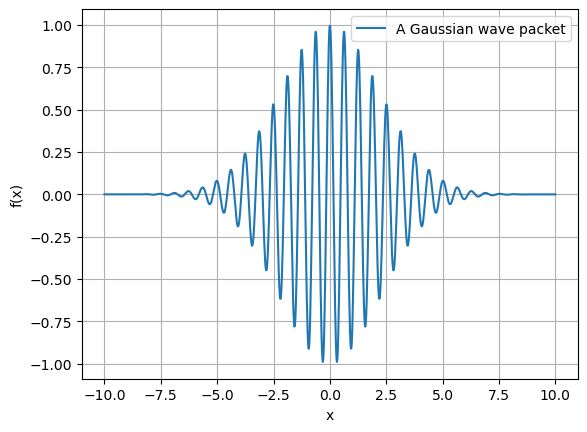

In [8]:
import matplotlib.pyplot as plt
def f(x, a=0.1, b=10):
    return np.cos(b*x)*np.exp(-a*x*x)

x = np.linspace(-10, 10, 1000)
y = f(x)
print(f(1))
plt.plot(x,y, label="A Gaussian wave packet")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()
plt.legend()
plt.show()

### Part 2  

Implementing the analytical derivative of f(x) in code:

In [9]:
def f_derived(x, a=0.1, b=10):
    return -b*np.sin(b*x)*np.exp(-a*x*x) - 2*a*x*np.cos(b*x)*np.exp(-a*x*x)


### Part 3  

calculating the derivative of sinx using the forward difference method:

In [10]:
def sine(x):
    return np.sin(x)

def forward_difference(f,x,h, **kwargs):
    """
    f: any function
    x: a point
    h: step size
    **kwargs: takes additional parameters
    """
    return (f(x+h, **kwargs) - f(x, **kwargs))/ h

print("sin(1) = ", sine(1))
print("cos(1) ≈", forward_difference(sine, 1, 1e-4))

sin(1) =  0.8414709848078965
cos(1) ≈ 0.5402602314175109


We then applied forward_difference() to function (6), choosing a step size of $h = 1e-4$

In [11]:
print("Numerical derivative:", forward_difference(f, x=1, h=1e-4))
print("Analytical derivative:", f_derived(1))

Numerical derivative: 5.078054076034233
Analytical derivative: 5.074351236525324


The code shows us that the numerical estimate is reasonably close to the analytical derivative.

### Part 4  

Calculating the derivative using central difference method:

In [12]:
def central_difference(f, x, h, **kwargs):
    """
    f: any function
    x: a point
    h: step size
    **kwargs: takes additional parameters
    """
    return 0.5*(f(x+h, **kwargs)-f(x-h, **kwargs))/h

print("Numerical derivative:", central_difference(f, x=1, h=1e-4))
print("Analytical derivative:", f_derived(1))

Numerical derivative: 5.0743503361028175
Analytical derivative: 5.074351236525324


### Part 5  

Quantifying numerical error

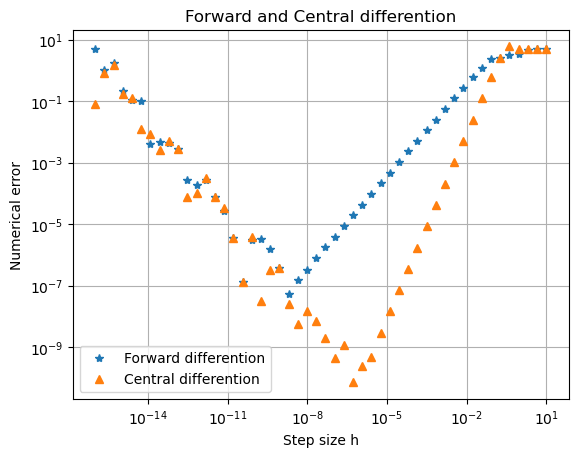

In [13]:
steps = np.logspace(-16, 1)

forward_diff = forward_difference(f, 1, steps)
central_diff = central_difference(f, 1, steps)
analytical = f_derived(1)


plt.plot(steps, np.abs(analytical - forward_diff), "*", label="Forward differention")
plt.plot(steps, np.abs(analytical - central_diff), "^", label="Central differention")
plt.grid()
plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Step size h")
plt.ylabel("Numerical error")
plt.title("Forward and Central differention")
plt.show()



The graph shows us numerical error as step size decreases from right to left. We see that with a large step size numerical error is high. As the step size decreases so does numerical error. At a certain point numerical error starts to increase again as the step size gets even smaller.

Using forward difference the numerical error decreases linearily as h decreases, for example if step size decreases by 100 the numerical error will reduce by 100. Central difference scales quadratically with $h^2$ meaning decreasing step size by 10 will reduce numerical error by 100.  

The reason for increasing numerical errors on both sides of each graph is a combination of truncation and roundoff errors. at the right side the dominant factor is truncation error. As we use smaller and smaller step size h our numerical approximations will get closer to the analytical derivative thus lower numerical error. So for a larger step size we will get a larger truncation error. 

The graph also shows numerical error is at its smallest when $h ≈ 10^{-9}$ for forward differention and $h ≈ 10^{-6}$ for central differention. We see that using lower values for h will lead to roundoff errors becoming more and more dominant. We use the following equation to see that the numerical error corresponds with the forward differention graph at the lowest point:


\begin{equation}
R = \frac{2 \epsilon |f(x)|}{h} + \frac{h}{2}|f''(\eta )|\tag{7}
\end{equation}

\begin{equation}
R = \frac{2 \times 2.2 \times 10^{-16} \times |-0.76| }{10^{-9}} + \frac{10^{-9}}{2} = 3.35 \times 10^{-7} \tag{8}
\end{equation}

# Excersice 4 - Automatic for the people?

In [14]:
# Shared imports (used in later parts)
import numpy as np

## Part 1 -  Familiarization with Classes

**Goal.** Understand how a simple class can encapsulate both a function value and its derivative, and why default
arguments matter.

### The `duple` class
The class below stores two related numbers:
- `top`: the function value, $f(x)$
- `bottom`: the derivative, $f'(x)$

If `bottom` is omitted, it defaults to 0, which is consistent with the fact that constants have zero derivative.

In [15]:
class duple:
    '''
    Class for automatic differentiation
    top: function value
    bottom: derivative of function 
    '''
    def __init__(self, top, bottom=0):
        self.top = top
        self.bottom = bottom

### Experiments
We compare an object created with and without an explicit derivative.

In [16]:
x = duple(3, 1)
y = duple(3)

print("x:", x.top, x.bottom)  # 3 1
print("y:", y.top, y.bottom)  # 3 0

x: 3 1
y: 3 0


### Explanation

When we create the object:

`x = duple(3, 1)`  
`print(x.top, x.bottom)`

the constructor `__init__(self, top, bottom=0)` is called with:  
- `x.top = 3` → the function value \( f(x) \)  
- `x.bottom = 1` → the derivative \( f'(x) \)  

This prints:  
**3 1**

---

If we instead write:

`y = duple(3)`  
`print(y.top, y.bottom)`

only the first argument is provided. Since the constructor has the default value `bottom=0`, Python assigns:  
- `y.top = 3` → the function value \( f(x) \)  
- `y.bottom = 0` → the derivative defaults to zero  

This prints:  
**3 0**

---

### Why does this make sense?

The `duple` class is designed to represent both a function value and its derivative.  
In calculus, a constant has derivative zero. Therefore, when no derivative is specified, the default of `0` ensures correct mathematical behavior.

- `duple(3, 1)` represents \( f(x) = 3, \; f'(x) = 1 \)  
- `duple(3)` represents \( f(x) = 3, \; f'(x) = 0 \)  

This demonstrates how **constructors** and **default arguments** in Python make the class both flexible and mathematically consistent.


# Second part of part 1

In [17]:
class Point:
    """Simple Point class in 3D space."""
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z

p = Point(1, 2, 3)
print("Point:", p.x, p.y, p.z)

Point: 1 2 3


This reinforces the idea that a class is a **blueprint** and each object is an **instance** with its own internal state.

## Part 2 — Subtraction and Unary Operators for `duple`
To behave like a numeric type, `duple` needs subtraction and unary operators. We implement:
- `__sub__(self, d)`: $(u-v)' = u' - v'$
- `__pos__(self)`: $+(u,u') = (u, u')$
- `__neg__(self)`: $-(u,u') = (-u, -u')$

We also add pretty string representations for readability.

## Addison and Subtraction

In [18]:
class duple:
    """
    Class for automatic differentiation
    top: function value
    bottom: derivative of function
    """
    def __init__(self, top, bottom=0):
        self.top = top
        self.bottom = bottom

    # u + v -> (u.top + v.top, u.bottom + v.bottom)
    def __add__(self, d):
        return duple(self.top + d.top, self.bottom + d.bottom)

    # Shown in REPL
    def __repr__(self):
        return "[" + str(self.top) + "," + str(self.bottom) + "]"

    # Shown by print(...)
    def __str__(self):
        return "[" + str(self.top) + "," + str(self.bottom) + "]"


# Demo (Part 1)
x = duple(1, 2)   # f(x)=1, f'(x)=2
y = duple(3, 4)   # g(x)=3, g'(x)=4
z = x + y

print(z.top, z.bottom)  # -> 4 6
print(x + y)            # -> [4,6]


4 6
[4,6]


In [19]:
class duple:
    '''
    Class for automatic differentiation (extended with more operators)
    '''
    def __init__(self, top, bottom=0):
        self.top = top
        self.bottom = bottom

    # u + v
    def __add__(self, d):
        return duple(self.top + d.top, self.bottom + d.bottom)

    # u - v
    def __sub__(self, d):
        return duple(self.top - d.top, self.bottom - d.bottom)

    # +u
    def __pos__(self):
        return duple(+self.top, +self.bottom)

    # -u
    def __neg__(self):
        return duple(-self.top, -self.bottom)

    def __repr__(self):
        return f"[{self.top},{self.bottom}]"

    def __str__(self):
        return f"[{self.top},{self.bottom}]"

In [20]:
a = duple(1, 2)
b = duple(3, 4)
print("+a ->", +a)   # [1,2]
print("-a ->", -a)   # [-1,-2]
print("a-b ->", a - b)  # [-2,-2]

+a -> [1,2]
-a -> [-1,-2]
a-b -> [-2,-2]


### What happens when you do `x + y`?

Let us consider two objects of the `duple` class:

`x = duple(1, 2)`  
`y = duple(3, 4)`  

Before we extend the class, if we try:

`z = x + y`  

Python raises an error:

**TypeError: unsupported operand type(s) for +: 'duple' and 'duple'**

This error occurs because Python does not automatically know how to add two objects of our custom class. The `+` operator works only on built-in data types unless we explicitly tell Python what to do.

---

### Fix: Operator Overloading with `__add__`

We fix the problem by adding the method `__add__` inside the class:

`def __add__(self, d):`  
&nbsp;&nbsp;&nbsp;&nbsp;`return duple(self.top + d.top, self.bottom + d.bottom)`

Now, when we call `x + y`, Python will create a new `duple` object where:

- the `top` values are added: `1 + 3 = 4`  
- the `bottom` values are added: `2 + 4 = 6`  

So:  
`x + y = [4, 6]`

---

### Improving the Output

Without further changes, printing the object shows a technical memory reference such as:  

`<__main__.duple object at 0x...>`

To make this more user-friendly, we also define:

- `__repr__` → how the object is shown in a Jupyter cell.  
- `__str__` → how the object is shown with `print()`.  

Both are set to return `"[top,bottom]"`.  

Now both `print(x+y)` and `x+y` directly display:

`[4,6]`

---

### Conclusion

When you do `x + y`:  
- Before defining `__add__`, it caused a **TypeError**.  
- After defining `__add__`, Python correctly returns a new object with the summed function value and derivative.  
- With `__repr__` and `__str__`, the result is displayed clearly as `[4,6]`.  

Thus, the `duple` class now supports addition exactly as intended, combining both function values and derivatives in one step.


## Part 3 — Multiplication and Division (Product & Quotient Rules)
Addition and subtraction treat `top` and `bottom` symmetrically because they are linear. For multiplication/division we
must apply calculus rules:

- **Product rule**: $(fg)' = f'g + fg'$  
- **Quotient rule**: $\left(\frac{f}{g}\right)' = \frac{f'g - fg'}{g^2}$

We extend `duple` accordingly.

In [21]:
class duple:
    '''
    Class for automatic differentiation (now with * and /)
    '''
    def __init__(self, top, bottom=0):
        self.top = top
        self.bottom = bottom

    def __add__(self, d):  # u+v
        return duple(self.top + d.top, self.bottom + d.bottom)

    def __sub__(self, d):  # u-v
        return duple(self.top - d.top, self.bottom - d.bottom)

    def __pos__(self):     # +u
        return duple(+self.top, +self.bottom)

    def __neg__(self):     # -u
        return duple(-self.top, -self.bottom)

    def __mul__(self, d):  # u*v
        return duple(self.top * d.top,
                     self.bottom * d.top + self.top * d.bottom)

    def __truediv__(self, d):  # u/v
        return duple(self.top / d.top,
                     (self.bottom * d.top - self.top * d.bottom) / (d.top ** 2))

    def __repr__(self):
        return f"[{self.top},{self.bottom}]"

    def __str__(self):
        return f"[{self.top},{self.bottom}]"

### Verification tests
We now test three functions at $x=1.2$: $x^3$, $\frac{1}{1+x}$, and $e^x\sin x$.

In [22]:
x_val = 1.2
One = duple(1.0, 0.0)
X = duple(x_val, 1.0)

# x^3
print("x^3  -> auto:", X*X*X, " analytical:", x_val**3, 3*x_val**2)

# 1/(1+x)
print("1/(1+x) -> auto:", One/(One+X), " analytical:", 1/(1+x_val), -1/(1+x_val)**2)

# exp(x)*sin(x)
Exp = duple(np.exp(x_val), np.exp(x_val))
Sin = duple(np.sin(x_val), np.cos(x_val))
print("exp*sin -> auto:", Exp*Sin,
      " analytical:", np.exp(x_val)*np.sin(x_val),
      np.exp(x_val)*(np.sin(x_val)+np.cos(x_val)))

x^3  -> auto: [1.728,4.32]  analytical: 1.7279999999999998 4.32
1/(1+x) -> auto: [0.45454545454545453,-0.20661157024793386]  analytical: 0.45454545454545453 -0.20661157024793386
exp*sin -> auto: [3.0944787419716917,4.297548854694511]  analytical: 3.0944787419716917 4.297548854694511


### Verification tests — what we did and what the results show

We verified our implementations of the **product rule** and **quotient rule** in `duple` by testing three functions at $x = 1.2$:

1. **Cubic function**  
   - Function: $f(x) = x^3$  
   - Analytical derivative: $f'(x) = 3x^2$  
   - Result: **auto diff** $[1.728,\; 4.32]$ vs **analytical** $(1.728,\; 4.32)$  

2. **Rational function**  
   - Function: $f(x) = \frac{1}{1+x}$  
   - Analytical derivative: $f'(x) = -\frac{1}{(1+x)^2}$  
   - Result: **auto diff** $[0.454545\ldots,\; -0.20661157\ldots]$  
     vs **analytical** $(0.454545\ldots,\; -0.20661157\ldots)$  

3. **Exponential–trigonometric product**  
   - Function: $f(x) = e^{x}\sin(x)$  
   - Analytical derivative:  

     $$
     f'(x) = e^{x}\sin(x) + e^{x}\cos(x)
     $$  

   - Result: **auto diff** $[3.09447874,\; 4.29754885]$  
     vs **analytical** $(3.09447874,\; 4.29754885)$  

---

#### Interpretation

- For $x^3$, repeated multiplication of dual numbers applies the **product rule** correctly.  
- For $\tfrac{1}{1+x}$, division of dual numbers applies the **quotient rule** correctly.  
- For $e^{x}\sin(x)$, the framework combines elementary functions via composition and multiplication, and the result matches the expected derivative.  

Across all three cases, the **automatic** results match the **analytical** results to machine precision (only minor rounding differences).  
This validates that our `__mul__` and `__truediv__` implementations correctly encode the product and quotient rules within the `duple` class.


## Part 4 — Adding More Functions via the Chain Rule
Real models compose elementary functions. Rather than hard–coding each derivative into `duple`, we introduce a *function
wrapper* `dfunction(f, df)` that applies the **chain rule** when called on a `duple`:
$$
(f(g(x)))' = f'(g(x))\,g'(x).
$$

In [23]:
class dfunction:
    def __init__(self, f, df):
        self.f = f
        self.df = df
    def __call__(self, d: duple):
        return duple(self.f(d.top), self.df(d.top) * d.bottom)

### Example: $\log(1+e^x)$

In [24]:
Log = dfunction(np.log, lambda z: 1/z)
Exp = dfunction(np.exp, np.exp)

x = 3.1
X = duple(x, 1)
One = duple(1.0, 0.0)

auto = Log(One + Exp(X))
analytical = (np.log(1+np.exp(x)), np.exp(x)/(1+np.exp(x)))
print("auto diff  =", auto)
print("analytical =", analytical[0], analytical[1])

auto diff  = [3.144063967938574,0.9568927450589139]
analytical = 3.144063967938574 0.9568927450589139


## Part 4 — Adding More Functions via the Chain Rule - results

Here we tested whether the `dfunction` class correctly applies the **chain rule**:

$$(f(g(x)))' = f'(g(x)) \cdot g'(x).$$

We used the function:

$$F(x) = \ln(1 + e^x).$$

---

### Verification of Results

For $x = 3.1$, the test produced:

- **Auto diff**: $[3.1440639679,\; 0.9568927450]$  
- **Analytical**: $\left(\ln(1+e^{3.1}), \; \frac{e^{3.1}}{1+e^{3.1}}\right) = (3.1440639679,\; 0.9568927450)$

The results matched exactly, up to numerical rounding.

---

### Discussion

- The value of the function matched: both methods gave $3.14406\dots$.  
- The derivative also matched: both gave $0.95689\dots$.  
- This shows that the **chain rule was applied correctly**:  
  - The outer function ($\ln$) contributed its derivative $1/x$,  
  - The inner function ($1 + e^x$) contributed $e^x$,  
  - And the system multiplied them together automatically.  

In other words, instead of explicitly writing the derivative of $\ln(1+e^x)$, the `dfunction` framework propagated the derivative correctly step by step.  
This demonstrates that the system can now handle **composed functions** in a general way, making it much more powerful and reusable.


As expected, both the value and derivative match: the derivative is $\frac{e^x}{1+e^x}$.

## Part 5 — Wave Function $f(x)=a\sin(bx)$
We now apply the framework to a simple wave:
$$
f(x)=a\sin(bx),\qquad f'(x)=ab\cos(bx).
$$

In [25]:
Sin = dfunction(np.sin, np.cos)

x = 0.7; a = 2.5; b = 1.3
X = duple(x, 1.0)
A = duple(a, 0.0)
B = duple(b, 0.0)

f_auto = A * Sin(B * X)
f_val  = a * np.sin(b*x)
f_der  = a*b*np.cos(b*x)

print("auto diff  =", f_auto)
print("analytical =", f_val, f_der)

auto diff  = [1.973759349224876,1.994673685838638]
analytical = 1.973759349224876 1.994673685838638


## Part 5 — Wave Function Verification

We tested the wave function  

$ f(x) = a\sin(bx), \qquad f'(x) = ab\cos(bx) $  

using the `dfunction` framework. For the chosen values $x = 0.7$, $a = 2.5$, and $b = 1.3$, the results were:

- **Auto diff**: $[1.973759349224876,\; 1.994673685838638]$  
- **Analytical**: $(1.973759349224876,\; 1.994673685838638)$

---

### Discussion

The automatic differentiation result matches the analytical calculation perfectly (up to floating-point tolerance). This confirms two important aspects:

1. **Correctness of composition**: The chain rule was applied correctly when handling $\sin(bx)$.  
2. **Scaling by constants**: Multiplication with $a$ and $b$ was handled properly by the product rule.

This shows that the framework not only works for simple functions like polynomials and rational functions, but also for composed wave functions where constants and trigonometric functions interact. The consistency between the two methods validates that our implementation of the chain rule and scaling in `dfunction` is mathematically sound.


## Part 6 — Reflections on Automatic Differentiation

Automatic differentiation (AD) has become a central tool in many scientific and engineering applications. One of the most prominent uses is in **machine learning**, where AD makes it possible to train neural networks efficiently through backpropagation. Without AD, calculating gradients for millions of parameters would be impractical. AD is also widely used in **optimization**, where gradient–based solvers such as quasi–Newton or conjugate gradient methods rely on accurate and efficient derivatives. In **computational physics and engineering**, AD is applied for sensitivity analysis, parameter estimation, and model calibration. Similarly, in **scientific computing**, AD is useful for constructing Jacobians required in solving systems of differential equations and for performing uncertainty quantification.

Compared to numerical differentiation, AD has several important advantages. First, it is **accurate**: while numerical differentiation relies on finite differences that are prone to truncation and round–off errors, AD computes derivatives exactly up to machine precision. Second, AD is **efficient**: it avoids the repeated function evaluations needed in finite–difference methods, which typically scale poorly with the number of input dimensions. For example, forward finite differences require $O(d)$ function evaluations for $d$ parameters, while AD can propagate derivatives with essentially the same cost as evaluating the function itself. Third, AD is **general**: once the differentiation rules for basic operations and functions are implemented, it can automatically handle any composition of these functions without additional work from the user.

However, AD is not without drawbacks. The main limitation is its **implementation complexity**. Numerical differentiation is conceptually simple—just evaluate the function at slightly perturbed values—whereas AD requires more advanced programming techniques such as operator overloading or computational graph tracing. Another potential weakness is **memory usage**, especially in reverse–mode AD, where many intermediate values must be stored to compute derivatives efficiently. Finally, AD can sometimes be less transparent or harder to debug than a straightforward finite–difference approach.

In summary, automatic differentiation combines high accuracy with computational efficiency, making it indispensable for modern computational workflows. While it requires more sophisticated implementation and can demand additional memory, its strengths outweigh these challenges in most practical applications, which explains why it is now the standard approach in areas like machine learning, optimization, and scientific computing.


## Conclusion and Discussion

## Self-reflections

**Stian**: I started quite early with the project and got a lot of work done over a steady period of time. I did Exercise 1 and 3, in which I found it enjoyable to both find out why floating point errors exist and also quantifying it in a plot. As a group i think it was pretty smooth as we managed to divide the tasks quickly and do our work.

### Self-reflections

**Ruhan:**  
I was mainly responsible for **Exercise 4 – Automatic Differentiation**, which involved everything from constructing the `duple` class to implementing addition, subtraction, multiplication/division, and finally extending it with the chain rule and more advanced functions. This meant working step by step from the basics of dual numbers to verifying that the framework handled composite expressions like $\log(1+e^x)$ and wave functions correctly.  

What I found most rewarding was seeing how Python’s operator overloading lets us encode calculus rules directly in code. At first, addition and subtraction were simple, but multiplication and division required careful use of the product and quotient rules. Extending the class with the chain rule showed me how easily new functions could be added once the core logic was in place. Verification against analytical derivatives confirmed that the framework was working as intended.  

Working on this project also taught me a lot about **structuring code and explanations in a Jupyter Notebook**. Writing Markdown explanations alongside code made me reflect more deeply on the mathematics behind each operator and function. It was not just about making the program run, but also about clearly explaining *why* the output was correct.  

Finally, I also saw the broader strengths of automatic differentiation compared to numerical methods: AD avoids truncation errors, gives results accurate to machine precision, and scales efficiently to more complex functions. The main challenge is implementation complexity, but I think this project gave me a strong foundation for understanding both the mathematics and the coding aspects of AD.  

As a group, I think we worked very well together and everything went smoothly. We divided the tasks in a balanced way and supported each other when needed, which made the workflow efficient and enjoyable.
